In [1]:
from notebooks.utils import fetch_runs, get_runs_data, differing_config

/Users/rodrigoalvarezlucendo/Desktop/ar-classification/.venv/lib/python3.12/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/Users/rodrigoalvarezlucendo/Desktop/ar-classification/.venv/lib/python3.12/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` m

In [2]:
runs = fetch_runs(
    entity="r-alvarezlucendo16", project="incremental-learning", tags_any=["ablation-mc"]
)
df = get_runs_data(runs, metrics=["val_loss", "teacher_val_loss"])
for run in runs:
    print(run.name)

visionary-wave-1690
faithful-violet-1691
splendid-glitter-1692
neat-snowball-1693
hardy-water-1694


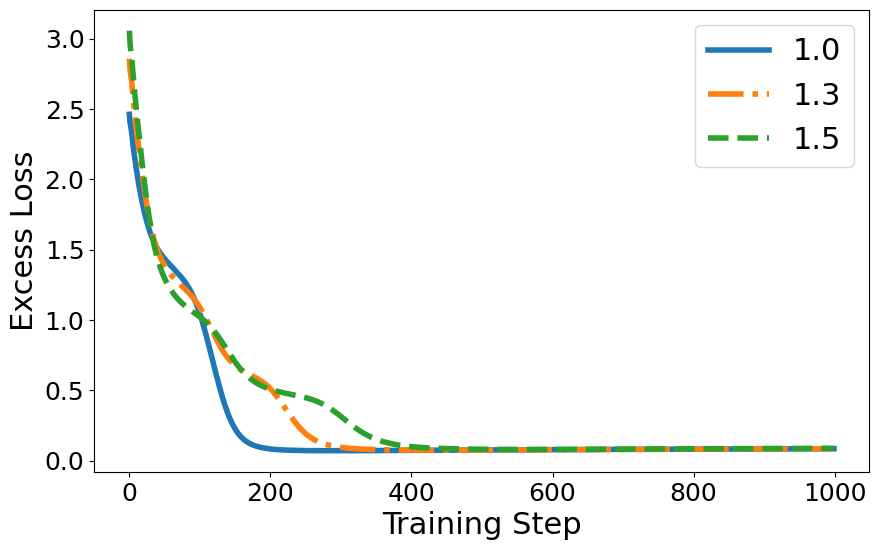

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
groups = df.groupby(["_run_name", "cfg.teacher.multiplicative_constant"], dropna=False)[["val_loss", "teacher_val_loss"]]
groups = sorted(groups, key=lambda x: x[0][1])
line_styles = ["-", "-.", "--"]
for i, ((name, mc), group) in enumerate(groups):
    if mc == 1 or mc == 1.3 or mc == 1.5:
        teacher_val_loss = group["teacher_val_loss"].iloc[0]
        val_loss = group["val_loss"].tolist() - teacher_val_loss
        val_loss = val_loss[:1000]
        plt.plot(val_loss, label=mc, linewidth=4, linestyle=line_styles[i])

plt.ylabel("Excess Loss", fontsize=22)
plt.xlabel("Training Step", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=22)
# plt.show()
plt.savefig("figures/mc-ablation/results/ablation-mc.pdf", bbox_inches="tight")